In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
response = requests.get("https://api.teleport.org/api/continents/geonames%3ANA/urban_areas/?embed=United%20States")
response

<Response [200]>

In [2]:
data = response.json()

In [3]:
data.keys()

dict_keys(['_links', 'count'])

In [4]:
href_name = data['_links']['ua:items']

In [5]:
name = [x['name'] for x in href_name]
href = [i['href'] for i in href_name]

In [6]:
dfs = []

for x in href:
    url = x + 'scores/'
    resp = requests.get(url)
    columns = [x['name'] for x in resp.json()['categories']]
    data = [x['score_out_of_10'] for x in resp.json()['categories']]
    df = pd.DataFrame(data).T
    df.columns = columns
    dfs.append(df)

In [7]:
data = pd.concat(dfs)

In [8]:
data['City Name'] = name
name

['Albuquerque',
 'Anchorage',
 'Asheville',
 'Atlanta',
 'Austin',
 'Baltimore',
 'Belize City',
 'Birmingham, AL',
 'Boise',
 'Boston',
 'Boulder',
 'Bozeman',
 'Buffalo',
 'Calgary',
 'Charleston',
 'Charlotte',
 'Chattanooga',
 'Chicago',
 'Cincinnati',
 'Cleveland',
 'Colorado Springs',
 'Columbus',
 'Dallas',
 'Denver',
 'Des Moines',
 'Detroit',
 'Edmonton',
 'Eugene',
 'Fort Collins',
 'Guadalajara',
 'Guatemala City',
 'Halifax',
 'Havana',
 'Honolulu',
 'Houston',
 'Indianapolis',
 'Jacksonville',
 'Kansas City',
 'Kingston',
 'Knoxville',
 'Las Vegas',
 'Los Angeles',
 'Louisville',
 'Madison',
 'Managua',
 'Memphis',
 'Mexico City',
 'Miami',
 'Milwaukee',
 'Minneapolis-Saint Paul',
 'Montreal',
 'Nashville',
 'New Orleans',
 'New York',
 'Oklahoma City',
 'Omaha',
 'Orlando',
 'Ottawa',
 'Palo Alto',
 'Panama',
 'Philadelphia',
 'Phoenix',
 'Pittsburgh',
 'Portland, ME',
 'Portland, OR',
 'Providence',
 'Raleigh',
 'Richmond',
 'Rochester',
 'Salt Lake City',
 'San Antonio'

In [9]:
data.set_index('City Name', inplace=True)

In [41]:
us_data = data.drop(['Belize City', 'Calgary', 'Guadalajara', 'Edmonton', 'Guatemala City',
 'Halifax', 'Havana', 'Managua', 'Mexico City', 'Montreal', 'Ottawa', 'Palo Alto', 'Panama', 'San Juan',
 'San Luis Obispo', 'San Salvador', 'Santo Domingo', 'Saskatoon', 'Toronto', 'Vancouver', 'Victoria', 'Winnipeg', 'Portland, ME'])

In [42]:
us_data

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors
City Name,,,,,,,,,,,,,,,,,
Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155
Anchorage,5.4335,3.141,2.7945,0.000,1.7380,4.71525,8.671000,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,4.9645,3.2660,7.0930,5.3580
Asheville,5.8560,5.311,3.5405,0.000,1.2095,1.35800,8.671000,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,4.7875,5.0630,7.7305,2.2655
Atlanta,4.9755,5.241,8.8350,7.257,5.2915,3.89775,8.671000,2.6725,8.534000,6.4570,5.81775,6.5145,4.2040,6.4805,7.7655,4.0620,5.0095
Austin,4.3345,5.355,9.2360,6.939,1.8515,4.33050,8.671000,5.0690,8.686667,5.3150,7.03075,6.5145,4.7720,9.0490,6.6980,6.7895,3.9090
Baltimore,4.8300,4.982,0.0000,4.358,3.6665,4.93475,5.502000,2.3730,8.944667,5.8805,5.78450,6.5145,4.0620,4.9880,0.0000,5.7550,3.9795
"Birmingham, AL",6.5555,5.133,4.3575,1.000,1.4355,2.02075,8.671000,1.7760,8.743333,3.6245,7.03750,6.5145,4.2040,5.1605,5.3835,4.8815,1.2660
Boise,6.9635,6.578,4.2050,2.596,1.3235,5.22500,8.671000,4.3605,8.881000,3.6245,8.06950,6.5145,4.0620,3.4420,4.1995,6.9275,5.2210
Boston,1.0000,4.259,9.5650,10.000,3.2150,4.39625,8.671000,7.7420,8.956000,8.6245,8.17050,6.5145,4.0620,5.7005,8.5640,8.4815,5.6600


In [43]:
us_data.index

Index(['Albuquerque', 'Anchorage', 'Asheville', 'Atlanta', 'Austin',
       'Baltimore', 'Birmingham, AL', 'Boise', 'Boston', 'Boulder', 'Bozeman',
       'Buffalo', 'Charleston', 'Charlotte', 'Chattanooga', 'Chicago',
       'Cincinnati', 'Cleveland', 'Colorado Springs', 'Columbus', 'Dallas',
       'Denver', 'Des Moines', 'Detroit', 'Eugene', 'Fort Collins', 'Honolulu',
       'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Kingston',
       'Knoxville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Madison',
       'Memphis', 'Miami', 'Milwaukee', 'Minneapolis-Saint Paul', 'Nashville',
       'New Orleans', 'New York', 'Oklahoma City', 'Omaha', 'Orlando',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland, OR', 'Providence',
       'Raleigh', 'Richmond', 'Rochester', 'Salt Lake City', 'San Antonio',
       'San Diego', 'San Francisco Bay Area', 'San Jose', 'Seattle',
       'St. Louis', 'Tampa Bay Area', 'Washington, D.C.'],
      dtype='object', name='City Name')

In [44]:
city_names = ['Albuquerque', 'Anchorage', 'Asheville', 'Atlanta', 'Austin',
       'Baltimore', 'Birmingham, AL', 'Boise', 'Boston', 'Boulder', 'Bozeman',
       'Buffalo', 'Charleston', 'Charlotte', 'Chattanooga', 'Chicago',
       'Cincinnati', 'Cleveland', 'Colorado Springs', 'Columbus', 'Dallas',
       'Denver', 'Des Moines', 'Detroit', 'Eugene', 'Fort Collins', 'Honolulu',
       'Houston', 'Indianapolis', 'Jacksonville', 'Kansas City', 'Kingston',
       'Knoxville', 'Las Vegas', 'Los Angeles', 'Louisville', 'Madison',
       'Memphis', 'Miami', 'Milwaukee', 'Minneapolis-Saint Paul', 'Nashville',
       'New Orleans', 'New York', 'Oklahoma City', 'Omaha', 'Orlando',
       'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland, OR',
       'Providence', 'Raleigh', 'Richmond', 'Rochester', 'Salt Lake City',
       'San Antonio', 'San Diego', 'San Francisco Bay Area', 'San Jose',
       'Seattle', 'St. Louis', 'Tampa Bay Area', 'Washington, D.C.']

In [40]:
len(city_names)

65

In [12]:
dropped_cost = us_data[us_data['Cost of Living'] != 0]

In [13]:
dropped_cost_edu = dropped_cost[dropped_cost['Education'] != 0]

In [14]:
dropped_cost_edu.shape

(60, 17)

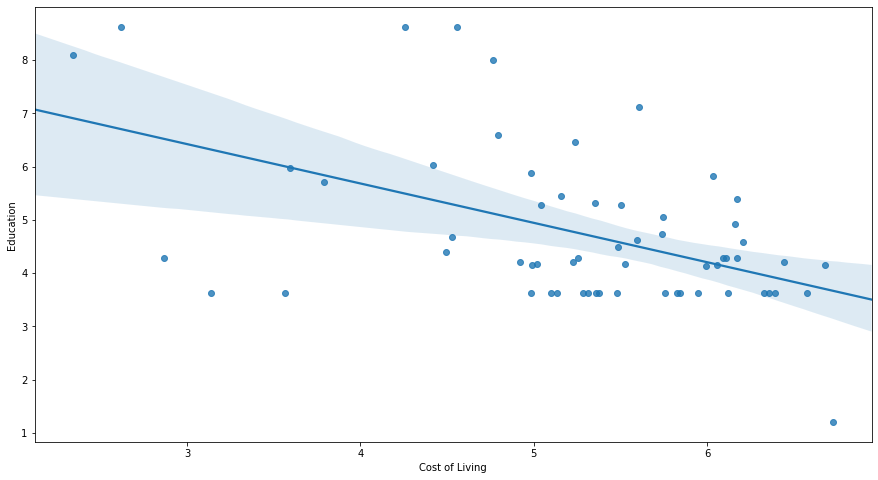

In [15]:
plt.figure(figsize=(15,8));
sns.regplot(dropped_cost_edu['Cost of Living'], dropped_cost_edu['Education']);

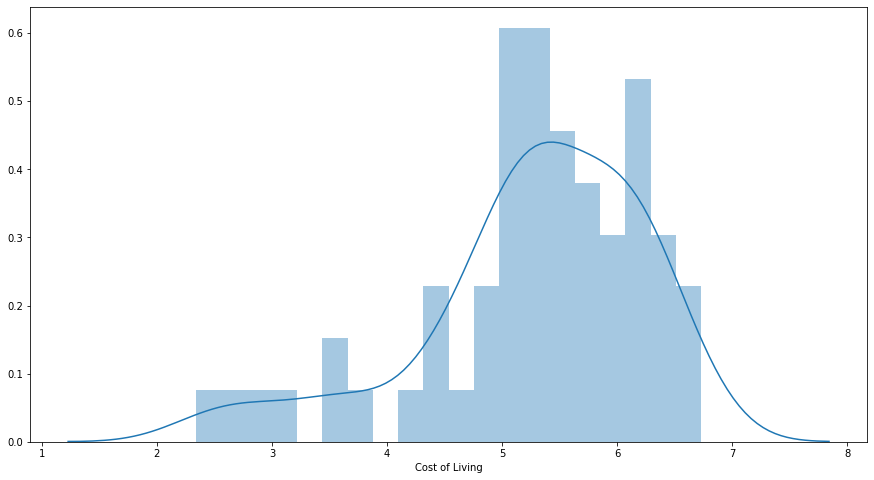

In [16]:
plt.figure(figsize=(15,8));
sns.distplot(dropped_cost_edu['Cost of Living'], bins=20);

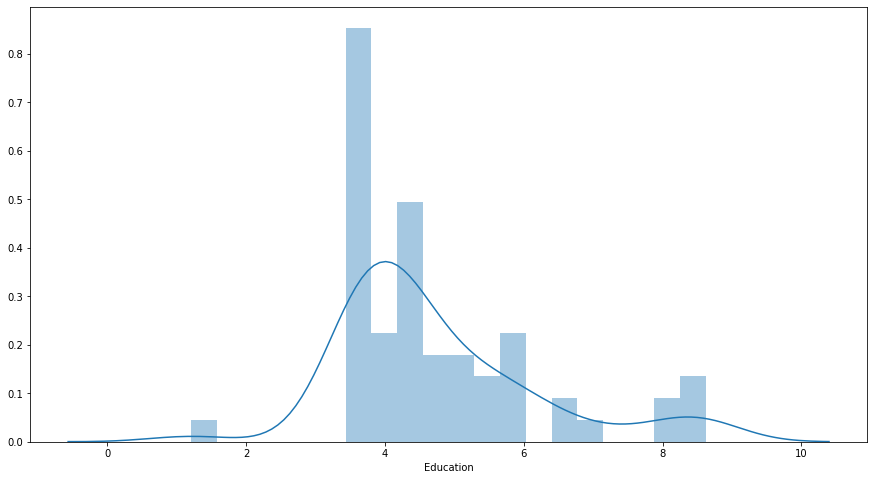

In [17]:
plt.figure(figsize=(15,8));
sns.distplot(dropped_cost_edu['Education'], bins=20);

In [18]:
dropped_cost_edu['Education'].describe()

count    60.000000
mean      4.746492
std       1.472744
min       1.209500
25%       3.624500
50%       4.280500
75%       5.332750
max       8.624500
Name: Education, dtype: float64

In [19]:
dropped_cost_edu['Cost of Living'].describe()

count    60.000000
mean      5.269933
std       0.994799
min       2.342000
25%       4.967500
50%       5.367000
75%       6.038750
max       6.728000
Name: Cost of Living, dtype: float64

In [20]:
education_value = np.asarray(dropped_cost_edu['Education'])
living_value = np.asarray(dropped_cost_edu['Cost of Living'])

In [21]:
scipy.stats.ttest_ind(living_value, education_value)

Ttest_indResult(statistic=2.281374698869844, pvalue=0.02431955009512471)

In [45]:
grad_rates = {'Albuquerque':71, 'Anchorage':78, 'Asheville':87, 'Atlanta':89, 'Austin':90,
       'Baltimore':80, 'Birmingham':86, 'Boise':80, 'Boston':91, 'Boulder':94, 'Bozeman':85,
       'Buffalo':82, 'Charleston':84, 'Charlotte':81, 'Chattanooga':90, 'Chicago':78,
       'Cincinnati': 80, 'Cleveland':79, 'Colorado Springs':78, 'Columbus':82, 'Dallas':74,
       'Denver':77, 'Des Moines':84, 'Detroit':80, 'Eugene':75, 'Fort Collins':80, 'Honolulu':90,
       'Houston':77, 'Indianapolis':89, 'Jacksonville':87, 'Kansas City':89, 'Kingston':89,
       'Knoxville':87, 'Las Vegas':85, 'Los Angeles':79, 'Louisville':93, 'Madison':95,
       'Memphis':84, 'Miami':85, 'Milwaukee':90, 'Minneapolis-Saint Paul':93, 'Nashville':89,
       'New Orleans':86, 'New York':85, 'Oklahoma City':88, 'Omaha':91, 'Orlando':89,
       'Philadelphia':89, 'Phoenix':86, 'Pittsburgh':93, 'Portland':91, 'Providence':86, 
       'Raleigh':91, 'Richmond':84, 'Rochester':90, 'Salt Lake City':90, 
       'San Antonio':84, 'San Diego':86, 'San Francisco Bay Area':88, 'San Jose':87,
       'Seattle':92, 'St. Louis':91, 'Tampa Bay Area':82, 'Washington, D.C.':90}

In [66]:
locations = grad_rates.keys()
rates = grad_rates.values()

In [61]:
len(us_data)

64

In [65]:
len(locations)

64

In [71]:
us_data['Graduation Percentage'] = rates
us_data['Locations'] = locations

In [72]:
us_data

,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Graduation Percentage,Locations
City Name,,,,,,,,,,,,,,,,,,,
Albuquerque,7.2620,6.059,3.7720,1.493,1.4555,5.05575,8.671000,1.3435,8.508667,4.1520,7.31950,6.5145,4.3460,5.3960,4.8900,7.0285,3.5155,71,Albuquerque
Anchorage,5.4335,3.141,2.7945,0.000,1.7380,4.71525,8.671000,3.4705,8.632667,3.6245,9.27200,6.5145,4.7720,4.9645,3.2660,7.0930,5.3580,78,Anchorage
Asheville,5.8560,5.311,3.5405,0.000,1.2095,1.35800,8.671000,5.8525,8.921333,3.6245,8.49325,6.5145,4.0620,4.7875,5.0630,7.7305,2.2655,87,Asheville
Atlanta,4.9755,5.241,8.8350,7.257,5.2915,3.89775,8.671000,2.6725,8.534000,6.4570,5.81775,6.5145,4.2040,6.4805,7.7655,4.0620,5.0095,89,Atlanta
Austin,4.3345,5.355,9.2360,6.939,1.8515,4.33050,8.671000,5.0690,8.686667,5.3150,7.03075,6.5145,4.7720,9.0490,6.6980,6.7895,3.9090,90,Austin
Baltimore,4.8300,4.982,0.0000,4.358,3.6665,4.93475,5.502000,2.3730,8.944667,5.8805,5.78450,6.5145,4.0620,4.9880,0.0000,5.7550,3.9795,80,Baltimore
"Birmingham, AL",6.5555,5.133,4.3575,1.000,1.4355,2.02075,8.671000,1.7760,8.743333,3.6245,7.03750,6.5145,4.2040,5.1605,5.3835,4.8815,1.2660,86,Birmingham
Boise,6.9635,6.578,4.2050,2.596,1.3235,5.22500,8.671000,4.3605,8.881000,3.6245,8.06950,6.5145,4.0620,3.4420,4.1995,6.9275,5.2210,80,Boise
Boston,1.0000,4.259,9.5650,10.000,3.2150,4.39625,8.671000,7.7420,8.956000,8.6245,8.17050,6.5145,4.0620,5.7005,8.5640,8.4815,5.6600,91,Boston


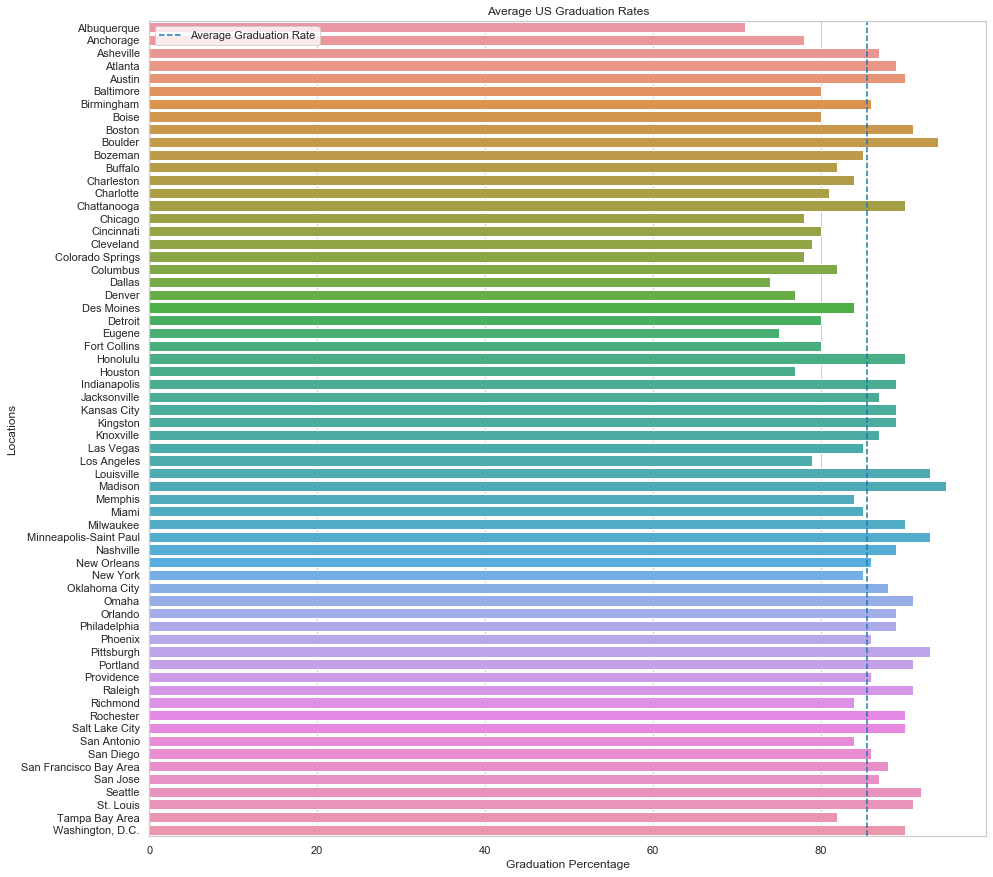

In [101]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,15))
sns.barplot(us_data['Graduation Percentage'], us_data['Locations'], hue_order='descending')
plt.axvline(us_data['Graduation Percentage'].mean(), linestyle='--', label='Average Graduation Rate')
plt.title('Average US Graduation Rates')
plt.legend(loc='upper left');